In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import  gamma
%matplotlib inline

Gamma分布:
    
$f(x)=\frac{x^{a-1}\ e^{-bx}}{\Gamma(a)}b^a,a>0,b>0$

$\Gamma(a)=\int_0^{+\infty} x^{a-1}e^{-x}dx,a>0,b>0$

In [2]:
def gamma_distribution(x,a,b):
    Z=gamma(a)/(b**a)
    y=x**(a-1)*np.exp(-b*x)/Z
    return y

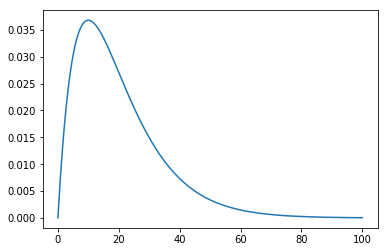

In [3]:
x=np.linspace(1e-3,100,1000)
y=gamma_distribution(x,2,0.1)
    
plt.figure()
plt.plot(x,y)

Beta 分布:

$f(x,a,b)=\frac{x^{a-1}(1-x)^{b-1}}{Z},a>0,b>0$

$Z=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$

In [4]:
def beta_distribution(x,a,b):
    Z=gamma(a)*gamma(b)/gamma(a+b)
    y=x**(a-1)*(1-x)**(b-1)/Z
    return y

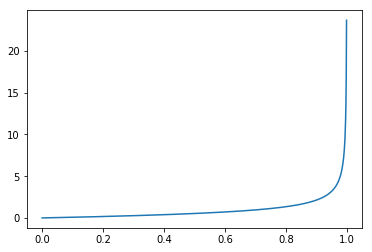

In [14]:
x=np.linspace(1e-3,1-1e-3,1000)
y=beta_distribution(x,2,.5)
plt.figure()
plt.plot(x,y)

(array([ 12.,   5.,  23.,  37.,  39.,  69.,  86., 109., 163., 457.]),
 array([0.05418185, 0.14876365, 0.24334545, 0.33792725, 0.43250905,
        0.52709085, 0.62167265, 0.71625446, 0.81083626, 0.90541806,
        0.99999986]),
 <a list of 10 Patch objects>)

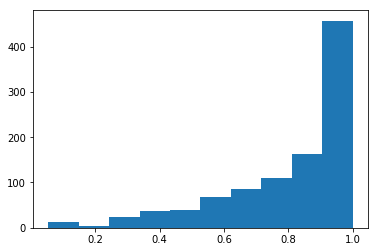

In [15]:
x=np.random.beta(2,.5,1000)
plt.figure()
plt.hist(x)

In [6]:
def gaussian(x,mu,sigma):
    Z=(2*np.pi*sigma)**0.5
    y=np.exp(-((x-mu)**2)/2/sigma)/Z
    return y

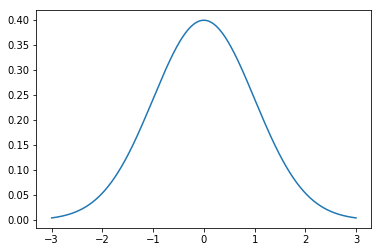

In [7]:
x=np.linspace(-3,3,1000)
y=gaussian(x,0,1)
plt.figure()
plt.plot(x,y)

## Markov chain


$$\begin{pmatrix} 
0.3 & 0.5 \\ 
0.7 & 0.5 \\ 
\end{pmatrix} $$

In [8]:
P=np.array([[0.3,0.5],[0.7,0.5]])
Pn=np.linalg.matrix_power(P,100)
S,V=np.linalg.eig(P)
e=np.argsort(S)[-1]
v=V[:,e]
v=v/np.sum(v)
print(v)

[0.41666667 0.58333333]


In [9]:
def markovChain(P,start=0,startCount=300,N=10000):
    current=start
    
    state1=0
    state2=0
    for i in range(N):
        p=P[:,current]
        current=np.random.choice(2,p=p)
        if i>startCount:
            state1=state1+1 if current==0 else state1
            state2=state2+1 if current==1 else state2
    return state1,state2

In [10]:
s1,s2=markovChain(P,startCount=500,N=3000)
print(s1/(s1+s2),s2/(s1+s2))

0.41976790716286516 0.5802320928371348


In [16]:
import pymc3 as pm